BBC News Article - text classification project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
newsDF = pd.read_csv('bbc-text.csv')

In [3]:
newsDF.head(5)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [59]:
newsDF.shape

(2225, 2)

In [4]:
newsDF.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [5]:
#drop where duplicates occur in text column
news = newsDF.drop_duplicates(['text'])

In [41]:
news.shape

(2126, 4)

In [56]:
#count and percentage of within categories
topic_df = pd.DataFrame(news.category.value_counts())
topic_df['percentages'] = round((topic_df.category * 100)/ 2126, 0)
topic_df

,category,percentages
sport,504,24.0
business,503,24.0
politics,403,19.0
entertainment,369,17.0
tech,347,16.0


Text(0.5, 0, 'count')

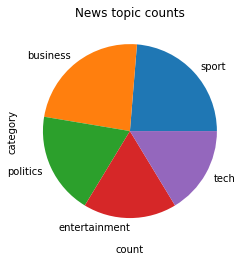

In [57]:
#plot topics
topic_counts = news.category.value_counts()
topic_counts.plot(kind='pie')
plt.title('News topic counts')
plt.xlabel('count')

In [8]:
#load necessary NLP packages
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [9]:
#remove special characters (already in lower case with spaces removed)
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text

In [10]:
removal = news['text']

special_removed = []
for remove in removal:
    special_removal = remove_special_characters(remove)
    special_removed.append(special_removal)
#news['clean_text'] = clean_docs
news['removed_special'] = special_removed

C:\Users\rosal\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
news.head(5)

,category,text,removed_special
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...


The text (article) in the data set was already in lower case. Removing special characters was performed. Removing the "stopwords" is a second step so the length of the articles (number of tokens) could be compared with and without stopwords. The  stopwords, articles, and other often used, meaningless words when taken out of context, are provided in the package provided by Natural Language Toolkit. Stopwords could be generated according to frequency for this corpus (or hand compiled) as parameter tuning for the Bag of Words and Term Frequency-Inverse Document Frequency (TF-IDF) extractors in SciKit-Learn. 

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rosal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rosal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
def remove_stopwords(text, is_lower_case=False, stopwords=None):
    if not stopwords:
        stopwords = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [15]:
docs = news['removed_special']

clean_docs = []
for doc in docs:
    clean_doc = remove_stopwords(doc)
    clean_docs.append(clean_doc)

news['clean_text'] = clean_docs

C:\Users\rosal\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
#Glimpse the article text with stopwords removed
news.head(5)

,category,text,removed_special,clean_text
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cri...


In [17]:
#for counting
from collections import Counter

In [88]:
#Top words in tech
tech= news[news.category=='tech']
words = [word for doc in tech['clean_text'] for word in doc.split()]
freq_mapt = Counter(words)
tech_words = freq_mapt.most_common(20)
tech_df= pd.DataFrame(tech_words, columns=['term', 'count'])
tech_df

,term,count
0,said,1368
1,people,828
2,also,460
3,mr,451
4,technology,450
5,new,449
6,one,437
7,could,426
8,mobile,420
9,would,415


In [22]:
#Top words in biz
business= news[news.category=='business']
words = [word for doc in business['clean_text'] for word in doc.split()]
freq_mapb = Counter(words)
biz_words=freq_mapb.most_common(20)
biz_df= pd.DataFrame(biz_words, columns=['term', 'count'])
biz_df

,term,count
0,said,1655
1,us,787
2,year,623
3,mr,596
4,would,459
5,also,432
6,market,417
7,company,412
8,new,401
9,growth,362


In [20]:
#Top words in entertainment
entertainment= news[news.category=='entertainment']
words = [word for doc in entertainment['clean_text'] for word in doc.split()]
freq_mape = Counter(words)
entertain_words=freq_mape.most_common(20)
entertain_df= pd.DataFrame(entertain_words, columns=['term', 'count'])
entertain_df

,term,count
0,said,803
1,film,711
2,best,563
3,music,423
4,also,382
5,one,350
6,us,350
7,year,346
8,show,318
9,new,315


In [19]:
#Top words in politics
politics= news[news.category=='politics']
words = [word for doc in politics['clean_text'] for word in doc.split()]
freq_mapp = Counter(words)
politics_words= freq_mapp.most_common(20)
politics_df= pd.DataFrame(politics_words, columns=['term', 'count'])
politics_df

,term,count
0,said,2174
1,mr,1614
2,would,1005
3,labour,728
4,government,712
5,people,607
6,party,544
7,election,536
8,blair,535
9,also,438


In [23]:
#Top words in sport
sport= news[news.category=='sport']
words = [word for doc in sport['clean_text'] for word in doc.split()]
freq_maps = Counter(words)
sports_words= freq_maps.most_common(20)
sport_df= pd.DataFrame(sports_words, columns=['term', 'count'])
sport_df

,term,count
0,said,927
1,game,468
2,england,455
3,first,432
4,win,408
5,would,396
6,world,374
7,last,367
8,one,354
9,two,349


Supervised Classification Models 
--- on two term (word) extraction methods: word counts in corpus; and words weighted for importance 

Vectorize word counts: Bag of Words  

CountVectorizer extracts a Bag of Words, words pooled with no use or sequence information, for the corpus (whole group of articles). This extractor creates a feature for each token in its default setting, "ngram_range; tuple (min_n, max_n), default=(1, 1)."  

In [26]:
#load Bag of Words vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
#instantiate vectorizer with default parameter
vectorizer0 = CountVectorizer(min_df=0)

In [60]:
#count vectorizer
vectorizer0.fit(news.text)
x0 = vectorizer0.transform(news.text)
#convert to dataframe and from sparse matrix to dense
x0_df = pd.DataFrame(x0.todense(), columns= vectorizer0.get_feature_names())
x0_df.head(3)

,00,000,0001,000bn,000m,000s,000th,001,001and,001st,...,zooms,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#(rows = number of articles, features = vocabulary of words)
x0_df.shape

(2126, 29421)

Table below is a glimpse of the numeric code for the word and the sum of the frequency the words occurred for all the articles. The second column below corresponds to the sum of every column in the matrix above . 

In [62]:
#Word-document (article) frequency table
word_doc_freq = x0_df.sum(axis=0).transpose().reset_index()
word_doc_freq.columns = ['Word', 'Article_Frequency']
word_doc_freq.head(5)

,Word,Article_Frequency
0,00,6
1,000,756
2,0001,1
3,000bn,1
4,000m,41


In [40]:
#Document frequency - unique word frequency table
#total of 10459 words occur only in the respecitve articles one time, ...
sorted_doc_freqs = np.sort(word_doc_freq.Article_Frequency)
counts = Counter(sorted_doc_freqs)
five_top_counts = pd.DataFrame(counts.most_common(5), columns=['Occurrence','Word Count'])
five_top_counts

,Occurence,Word Count
0,1,10459
1,2,4339
2,3,2350
3,4,1653
4,5,1151


Tune parameter for extracting the minimum occurrence of the word within the Bag of Words, "min_df," by visualizing cumulative distribution of word frequencies by number of documents (i.e., articles).

In [63]:
#compute cumulative freq % per doc freq
counts = counts.items()
x_ax = np.array([item[0] for item in counts])
freqs = np.array([item[1] for item in counts])
y_ax = freqs.cumsum() /freqs.cumsum()[-1]

Text(0.5, 1.0, 'Cumulative Distribution of Document Frequencies')

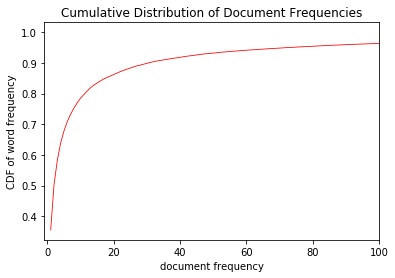

In [64]:
#plot CDF
plt.plot(x_ax, y_ax, linewidth=0.8, color="r")
plt.xlim([-1, 100])
plt.xlabel('document frequency')
plt.ylabel('CDF of word frequency')
plt.title("Cumulative Distribution of Document Frequencies")

In [65]:
#Vectorizer with min_df tuned
vectorizer = CountVectorizer(min_df=2)
vectorizer.fit(news.text)
x = vectorizer.transform(news.text)

In [66]:
x.shape

(2126, 17240)

Run classification models on Bag of Words: KNN; Logistic; Random Forest, Gradient Boost, Naive Bayes
  using Scikit-Learn 

In [67]:
#make X features (x = vectorizer.transform(news.text)) and y classes
X = x
y = news.category

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

Split training and test sets on Bag of Words, training on 70 percent of sample

In [69]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=23)

K-Nearest Neighbors ("KNN")

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
k_pred_y = knn.predict(X_test)

In [71]:
knn.classes_

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [72]:
#print metrics
print('KNN')
print(confusion_matrix(y_test, k_pred_y))
print(classification_report(y_test, k_pred_y))

KNN
[[129   0   2  17   2]
 [ 19  59   2  28   2]
 [ 25   4  81   8   1]
 [  5   3   2 143   2]
 [ 38   7   7   4  48]]
               precision    recall  f1-score   support

     business       0.60      0.86      0.70       150
entertainment       0.81      0.54      0.64       110
     politics       0.86      0.68      0.76       119
        sport       0.71      0.92      0.81       155
         tech       0.87      0.46      0.60       104

     accuracy                           0.72       638
    macro avg       0.77      0.69      0.70       638
 weighted avg       0.76      0.72      0.71       638



Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lr_pred_y = logreg.predict(X_test)

C:\Users\rosal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rosal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [74]:
#print metrics
print('LogisticRegression')
print(confusion_matrix(y_test, lr_pred_y))
print(classification_report(y_test, lr_pred_y))

LogisticRegression
[[144   0   4   0   2]
 [  2 105   1   0   2]
 [  2   2 114   1   0]
 [  0   0   0 155   0]
 [  7   2   1   0  94]]
               precision    recall  f1-score   support

     business       0.93      0.96      0.94       150
entertainment       0.96      0.95      0.96       110
     politics       0.95      0.96      0.95       119
        sport       0.99      1.00      1.00       155
         tech       0.96      0.90      0.93       104

     accuracy                           0.96       638
    macro avg       0.96      0.96      0.96       638
 weighted avg       0.96      0.96      0.96       638



Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rf_pred_y =rforest.predict(X_test)

C:\Users\rosal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [76]:
#print metrics
print('RandomForest')
print(confusion_matrix(y_test, rf_pred_y))
print(classification_report(y_test, rf_pred_y))

RandomForest
[[145   1   2   1   1]
 [ 11  85   3   8   3]
 [ 11   3 100   5   0]
 [  4   0   0 151   0]
 [ 14   8   2   4  76]]
               precision    recall  f1-score   support

     business       0.78      0.97      0.87       150
entertainment       0.88      0.77      0.82       110
     politics       0.93      0.84      0.88       119
        sport       0.89      0.97      0.93       155
         tech       0.95      0.73      0.83       104

     accuracy                           0.87       638
    macro avg       0.89      0.86      0.87       638
 weighted avg       0.88      0.87      0.87       638



Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

gboost = GradientBoostingClassifier()
gboost.fit(X_train, y_train)
gb_pred_y = gboost.predict(X_test)

In [78]:
#print metrics
print('GradientBoosting')
print(confusion_matrix(y_test, gb_pred_y))
print(classification_report(y_test, gb_pred_y))

GradientBoosting
[[140   3   5   0   2]
 [  3 104   0   0   3]
 [  9   0 108   2   0]
 [  0   0   0 155   0]
 [  9   1   1   0  93]]
               precision    recall  f1-score   support

     business       0.87      0.93      0.90       150
entertainment       0.96      0.95      0.95       110
     politics       0.95      0.91      0.93       119
        sport       0.99      1.00      0.99       155
         tech       0.95      0.89      0.92       104

     accuracy                           0.94       638
    macro avg       0.94      0.94      0.94       638
 weighted avg       0.94      0.94      0.94       638



Naive Bayes (multinomial)

In [79]:
from sklearn.naive_bayes import MultinomialNB

nbayes = MultinomialNB()
nbayes.fit(X_train, y_train)
nb_pred_y = nbayes.predict(X_test)

In [80]:
#print metrics
print('NaiveBayes')
print(confusion_matrix(y_test, nb_pred_y))
print(classification_report(y_test, nb_pred_y))

NaiveBayes
[[144   1   2   0   3]
 [  1 105   2   0   2]
 [  2   1 116   0   0]
 [  0   0   0 155   0]
 [  3   1   1   0  99]]
               precision    recall  f1-score   support

     business       0.96      0.96      0.96       150
entertainment       0.97      0.95      0.96       110
     politics       0.96      0.97      0.97       119
        sport       1.00      1.00      1.00       155
         tech       0.95      0.95      0.95       104

     accuracy                           0.97       638
    macro avg       0.97      0.97      0.97       638
 weighted avg       0.97      0.97      0.97       638



Three top performining models - Naive Bayes, Logistic Regression and Gradient Boosting

Naive Bayes, the best performing model, had an accuracy of .97, seeming unlikely to get better. 

Logistic Regression was sensitive to whether the special characters had been removed or not (not shown here), performed with f1-scores of .95 and .96 respectively. Results are balanced between precision and recall across three of the topics. Also, the model performs best on the weighted, TF-IDF vectorized text. This model potentially could perform better on the Bag of Word with the regularization parameter, "C," tuned.

Tuning C, Regularization Parameter of the Logistic Regression model

In [81]:
#tune parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.5, 1.0, 5.0]}
lrc = LogisticRegression()
lrc_gs = GridSearchCV(lrc, param_grid, cv=5)

lrc_gs.fit(X_train, y_train)

print("Tuned Logistic Regression Parameter: {}".format(lrc_gs.best_params_)) 
print("Best score is {}".format(lrc_gs.best_score_))

C:\Users\rosal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rosal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Tuned Logistic Regression Parameter: {'C': 1.0}
Best score is 0.9670698924731183


The best parameter for the model was the default. The small difference between the scoring on the bag of words with and without special characters could be an artefact of Scikit-Learn. Documentation NOTE: The underlying C implementation uses a random number generator to select features when fitting the model. It is thus not uncommon, to have slightly different results for the same input data.

Classification models on TF-IDF ("term importance") text -
   Three best performing models: Naive Bayes; Logistic Regression; Gradient Boosting 

TF-IDF refers to Term Frequency-Inverse Docoument Frequency which describes how it computes the "importance". The vectorizer for TF-IDF is also an extractor in Scikit-Learn.

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

weighted = TfidfVectorizer()
weighted.fit(news.text)
xw = weighted.transform(news.text)

#make X features and y classes
Xw = xw
yw = news.category

Splitting the news article sample between training and testing data for the TF-IDG vectorized text.

In [39]:
#TF-IDF (w suffix)
Xw_train, Xw_test, yw_train, yw_test =train_test_split(Xw, yw, test_size=0.3, random_state=23)

Logistic Regression 

In [44]:
logregw = LogisticRegression()
logregw.fit(Xw_train, yw_train)
lr_pred_yw = logregw.predict(Xw_test)

C:\Users\rosal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rosal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [46]:
#print metrics
print('LogisticRegression on TF-IDF')
print(confusion_matrix(yw_test, lr_pred_yw))
print(classification_report(yw_test, lr_pred_yw))

LogisticRegression on TF-IDF
[[147   0   1   0   2]
 [  3 104   0   0   3]
 [  3   1 114   1   0]
 [  0   0   0 155   0]
 [  6   0   1   1  96]]
               precision    recall  f1-score   support

     business       0.92      0.98      0.95       150
entertainment       0.99      0.95      0.97       110
     politics       0.98      0.96      0.97       119
        sport       0.99      1.00      0.99       155
         tech       0.95      0.92      0.94       104

     accuracy                           0.97       638
    macro avg       0.97      0.96      0.96       638
 weighted avg       0.97      0.97      0.97       638



Gradient Boosting

In [47]:
gboostw = GradientBoostingClassifier()
gboostw.fit(Xw_train, yw_train)
gb_pred_yw = gboostw.predict(Xw_test)

In [48]:
#print metrics
print('GradientBoosting on TF-IDF')
print(confusion_matrix(yw_test, gb_pred_yw))
print(classification_report(yw_test, gb_pred_yw))

GradientBoosting on TF-IDF
[[142   2   4   0   2]
 [  6 101   0   1   2]
 [  6   1 110   2   0]
 [  0   0   1 154   0]
 [  5   3   1   0  95]]
               precision    recall  f1-score   support

     business       0.89      0.95      0.92       150
entertainment       0.94      0.92      0.93       110
     politics       0.95      0.92      0.94       119
        sport       0.98      0.99      0.99       155
         tech       0.96      0.91      0.94       104

     accuracy                           0.94       638
    macro avg       0.95      0.94      0.94       638
 weighted avg       0.94      0.94      0.94       638



Naive Bayes (multinomial)

In [49]:
nbayesw = MultinomialNB()
nbayesw.fit(Xw_train, yw_train)
nb_pred_yw = nbayesw.predict(Xw_test)

In [50]:
#print metrics
print('NaiveBayes on TF-IDF')
print(confusion_matrix(yw_test, nb_pred_yw))
print(classification_report(yw_test, nb_pred_yw))

NaiveBayes on TF-IDF
[[148   0   1   0   1]
 [  5  87   7  11   0]
 [  2   0 115   2   0]
 [  0   0   0 155   0]
 [  6   0   5   7  86]]
               precision    recall  f1-score   support

     business       0.92      0.99      0.95       150
entertainment       1.00      0.79      0.88       110
     politics       0.90      0.97      0.93       119
        sport       0.89      1.00      0.94       155
         tech       0.99      0.83      0.90       104

     accuracy                           0.93       638
    macro avg       0.94      0.91      0.92       638
 weighted avg       0.93      0.93      0.92       638



The Logistic Regression classifier had an average accuracy of .96 across the two extractions of the text. Naïve Bayes averaged .95 and Gradient Boosting remained the same at .94. These classification models, with default parameters, classified the words associated with the five categories better than nine out of ten times and showed very little sensitivity to the method of extraction.